<a href="https://colab.research.google.com/github/laylamoguibmm/Tasks/blob/main/task1_elevvopaths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
print("🔹 First 5 rows:")
print(df.head())

print("\n🔹 Info:")
print(df.info())

print("\n🔹 Missing values:")
print(df.isnull().sum())

print("\n🔹 Columns:")
print(df.columns)


🔹 First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Income Teacher_Quality  \


In [7]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')
print(df.columns)

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')


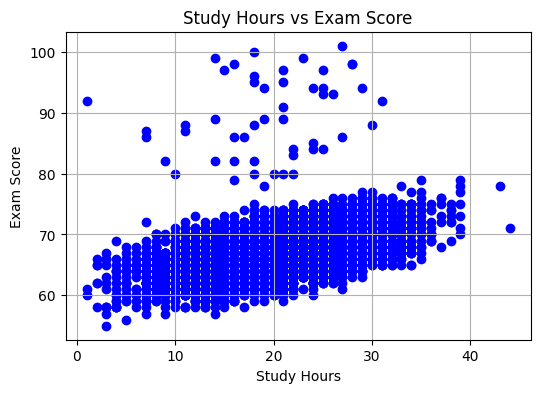

In [8]:
plt.figure(figsize=(6, 4))
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color='blue')
plt.title('Study Hours vs Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

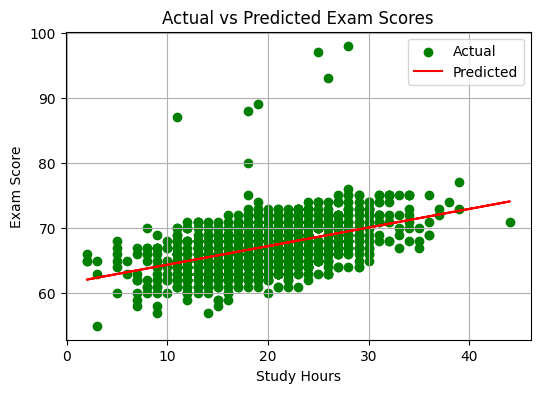

In [9]:
X = df[['Hours_Studied']]
y = df['Exam_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='green', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Exam Scores')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
print("\n📊 Model Performance:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")


📊 Model Performance:
Mean Absolute Error: 2.45
Mean Squared Error: 10.86
R² Score: 0.23


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


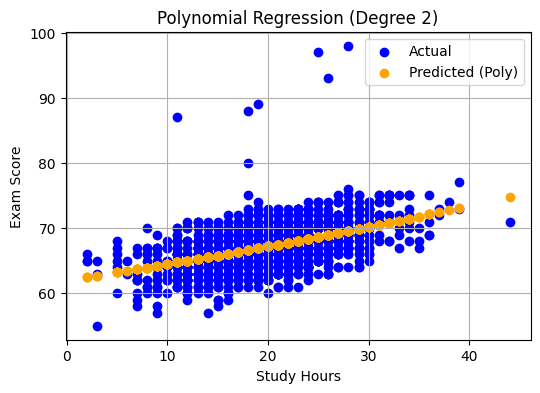

In [12]:
# Polynomial Regression (Degree 2)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_train, y_train)

y_poly_pred = poly_model.predict(X_test)

plt.figure(figsize=(6, 4))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_poly_pred, color='orange', label='Predicted (Poly)')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
print("\n🔍 Polynomial Model Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_poly_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_poly_pred):.2f}")
print(f"R² Score: {r2_score(y_test, y_poly_pred):.2f}")


🔍 Polynomial Model Evaluation:
Mean Absolute Error: 2.44
Mean Squared Error: 10.84
R² Score: 0.23


In [17]:
selected_features = [
    'Hours_Studied',
    'Sleep_Hours',
    'Motivation_Level',
    'Tutoring_Sessions',
    'Previous_Scores'
]

X_multi = df[selected_features].copy()
y_multi = df['Exam_Score']

X_multi_encoded = pd.get_dummies(X_multi, drop_first=True)  # drop_first avoids dummy trap

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi_encoded, y_multi, test_size=0.2, random_state=42)

multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

y_multi_pred = multi_model.predict(X_test_multi)

In [18]:
print("\n🧠 Multi-Feature Model Evaluation (with encoding):")
print(f"Mean Absolute Error: {mean_absolute_error(y_test_multi, y_multi_pred):.2f}")
print(f"Mean Squared Error: {mean_squared_error(y_test_multi, y_multi_pred):.2f}")
print(f"R² Score: {r2_score(y_test_multi, y_multi_pred):.2f}")


🧠 Multi-Feature Model Evaluation (with encoding):
Mean Absolute Error: 2.32
Mean Squared Error: 10.03
R² Score: 0.29
